In [221]:
import csv

In [222]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

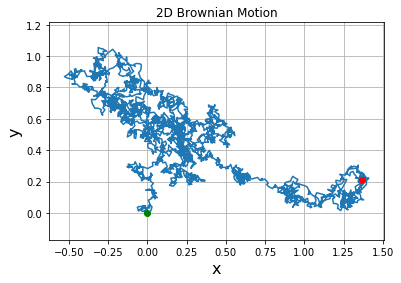

In [297]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 3000
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

`Mean Square Difference`

In [307]:
xx = x[0]; yy = x[1]

In [308]:
xx.shape[0]

3001

In [309]:
p = [1,2,3,4,5]
q = [6,7,8,9,10]

In [310]:
arr = []
arr.append(1)
arr.append(4)
arr.append(10)
np_arr = np.array(arr)

In [311]:
arr

[1, 4, 10]

In [312]:
arr = []

In [313]:
arr

[]

In [314]:
xx.shape[0]

3001

In [306]:
range(1,4)

range(1, 4)

In [315]:
N = xx.shape[0]; count = 1; n=N-1; q = N; sqDisplacement = []
for n in range(1,N-1):
    #print('n =',n)
    for i in range(1,N-n):
        #print('i = ',i)
        #print('n = ',n)
        sqDisplacement.append( ((xx[i+n]-xx[i])**2) + ((yy[i+n]-yy[i])**2) )
    sqDisp = np.array(sqDisplacement)
    msd = np.mean(sqDisplacement)
    with open('msd.csv','a') as fd:
        writer = csv.writer(fd)
        writer.writerow([msd])

In [316]:
import pandas as pd
msd = pd.read_csv('msd.csv',names=['msd'])
msd.shape

(2999, 1)

In [319]:
tym = np.linspace(0,1,2999)
tym.shape

(2999,)

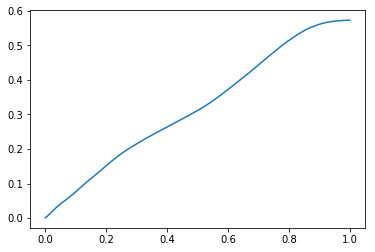

In [363]:
import matplotlib.pyplot as plt

plt.plot(tym,msd)

In [346]:
tym.reshape(2999,1)
tym.shape

(2999,)

In [347]:
msd.shape

(2999, 1)

In [344]:
#msd = msd.values
msd

array([[4.22079391e-04],
       [6.42175695e-04],
       [8.64711051e-04],
       ...,
       [5.72575110e-01],
       [5.72575731e-01],
       [5.72576029e-01]])

In [358]:
z = np.polyfit(tym,msd,3)

In [355]:
z.shape

(4, 1)

In [352]:
from scipy.optimize import curve_fit

def diffu(tym,D):
    return tym*D

popt, pcov = curve_fit(diffu,tym,msd)

plt.scatter(tym,msd)
plt.plot(tym,diffusion(tym,*popt))

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [ ]:
def funcx(xf, Lp):
    return np.exp(-xf/(2*Lp))
#curve fit
popt, pcov = curve_fit(func, xf, yf)
plt.plot(xf, func(xf, *popt))

In [360]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(tym, msd)  # perform linear regression
Y_pred = linear_regressor.predict(tym)  # make predictions

plt.scatter(tym, msd)
plt.plot(tym, Y_pred, color='red')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0.00000000e+00 3.33555704e-04 6.67111408e-04 ... 9.99332889e-01
 9.99666444e-01 1.00000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [364]:
tym.shape

(2999,)